In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('HeatDemand.csv')
df.head()


,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep),Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep),TZ_001:Zone People Occupant Count [](TimeStep:ON),TZ_001:Zone People Sensible Heating Rate [W](TimeStep),TZ_001:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep),DH:District Heating Hot Water Energy [KJ](TimeStep:ON),DH:District Heating Hot Water Rate [KW](TimeStep:ON),DH:District Heating Inlet Temperature [C](TimeStep:ON)
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50.497571
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,51.527310
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,55.764263
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59.233313
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61.240683


In [ ]:
df1 = df


In [6]:
X = df1.drop(columns=['Date/Time','DH:District Heating Inlet Temperature [C](TimeStep:ON)'])

In [7]:
y = df1['DH:District Heating Inlet Temperature [C](TimeStep:ON)']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

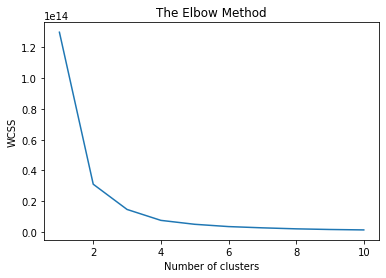

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

In [12]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 1], dtype=int32)

In [15]:
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


TypeError: '(array([ True, False, False, ...,  True, False, False]), 0)' is an invalid key

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()